# A minimal example

In [4]:
import tensorflow as tf

# Initialize variables
w = tf.Variable(0, dtype=tf.float32)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

# Define the cost function
def cost_fn():
    coefficients = tf.constant([1.0, -2.0, 4.0], dtype=tf.float32)
    return coefficients[0] * w**2 + coefficients[1] * w + coefficients[2]

# Perform the optimization
for _ in range(1000):
    optimizer.minimize(cost_fn, [w])

print(f"Cost function is minimized at {w.numpy()}")

Cost function is minimized at 1.0


# A larger example

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class Optimizer:
    def __init__(self, cost_fn, optimizer='adam', learning_rate=0.1, iterations=1000):
        """
        Initialize the optimizer with a cost function and optimization parameters.
        
        Args:
        cost_fn: A callable function that calculates the cost given variables.
        optimizer: String name of the optimizer to use.
        learning_rate: Learning rate for the optimizer.
        iterations: Number of iterations for the optimization process.
        """
        self.cost_fn = cost_fn
        self.iterations = iterations
        self.optimizer = self._select_optimizer(optimizer, learning_rate)
        self.path = []  # Store the path for visualization

    def _select_optimizer(self, optimizer_name, learning_rate):
        optimizer_map = {
            'gradient_descent': tf.keras.optimizers.SGD(learning_rate=learning_rate),
            'rmsprop': tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
            'adam': tf.keras.optimizers.Adam(learning_rate=learning_rate),
            'adagrad': tf.keras.optimizers.Adagrad(learning_rate=learning_rate),
            'momentum': tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9),
        }
        return optimizer_map[optimizer_name.lower()]

    def minimize(self, variables):
        """
        Perform the optimization of the variables to minimize the cost function.
        
        Args:
        variables: A list of TensorFlow variables to optimize.
        
        Returns:
        A tuple of optimized variables, final cost, and the optimization path.
        """
        for _ in range(self.iterations):
            self.optimizer.minimize(lambda: self.cost_fn(*variables), variables)
            self.path.append([var.numpy() for var in variables])

        final_cost = self.cost_fn(*variables).numpy()
        return variables, final_cost, self.path

    def plot_cost_and_path(self, plot_ranges, resolution=100):
        """
        Visualizes the optimization path on the cost function's plot for 1D or contour plot for 2D.
        
        Args:
        plot_ranges: A list of tuples specifying the plot range for each variable, e.g., [(-5, 5)] for 1D or [(-5, 5), (-5, 5)] for 2D.
        resolution: Number of points in each dimension for the plot.
        """
        if len(plot_ranges) == 1:  # 1D case
            variable_range = plot_ranges[0]
            variable_values = np.linspace(*variable_range, resolution)
            costs = np.vectorize(lambda var: self.cost_fn(tf.constant(var, dtype=tf.float32)).numpy())(variable_values)

            plt.figure(figsize=(10, 4))
            plt.plot(variable_values, costs, 'b-', label='Cost Function')
            path = np.array(self.path).flatten()
            plt.plot(path, np.vectorize(self.cost_fn)(path), 'ro-', label='Optimization Path')
            plt.title('Cost Function and Optimization Path (1D)')
            plt.xlabel('Variable')
            plt.ylabel('Cost')
            plt.legend()
            plt.show()

        elif len(plot_ranges) == 2:  # 2D case
            w1_range, w2_range = plot_ranges
            w1_values, w2_values = np.meshgrid(np.linspace(*w1_range, resolution), np.linspace(*w2_range, resolution))
            Z = np.vectorize(lambda w1, w2: self.cost_fn(tf.constant(w1, dtype=tf.float32), tf.constant(w2, dtype=tf.float32)).numpy())(w1_values, w2_values)

            fig, ax = plt.subplots(figsize=(10, 8))
            contour = ax.contourf(w1_values, w2_values, Z, levels=50, cmap='viridis')
            plt.colorbar(contour, ax=ax)
            ax.set_title('Cost Function Contour and Optimization Path (2D)')
            ax.set_xlabel('Variable 1')
            ax.set_ylabel('Variable 2')

            paths = np.array(self.path)
            ax.plot(paths[:, 0], paths[:, 1], 'r--', linewidth=2, label='Optimization Path')
            ax.plot(paths[-1, 0], paths[-1, 1], 'ro', label='Optimized Point')
            ax.legend()
           


1D Optimization:
Optimized Position: x = 3.000000238418579
Final Cost: 4.0


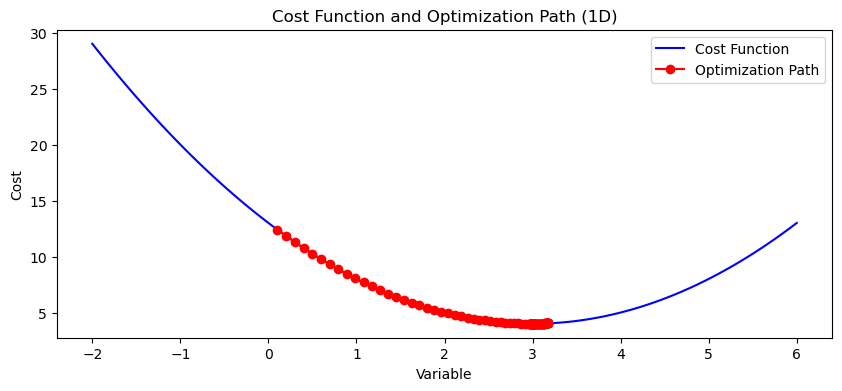

In [7]:
# Define the cost function for 1D minimization
def cost_fn_1d(x):
    return (x - 3)**2 + 4

# Initialize the variable for 1D optimization
x = tf.Variable(0.0, dtype=tf.float32)

# Create and use the optimizer for 1D case
optimizer_1d = Optimizer(cost_fn_1d, optimizer='adam', learning_rate=0.1, iterations=500)
variables_1d, final_cost_1d, _ = optimizer_1d.minimize([x])

# Output results
print(f"1D Optimization:")
print(f"Optimized Position: x = {x.numpy()}")
print(f"Final Cost: {final_cost_1d}")

# Plot the cost function and the optimization path for 1D
optimizer_1d.plot_cost_and_path(plot_ranges=[(-2, 6)], resolution=100)



2D Optimization:
Optimized Positions: x = -2.0, y = 4.0
Final Cost: 0.0


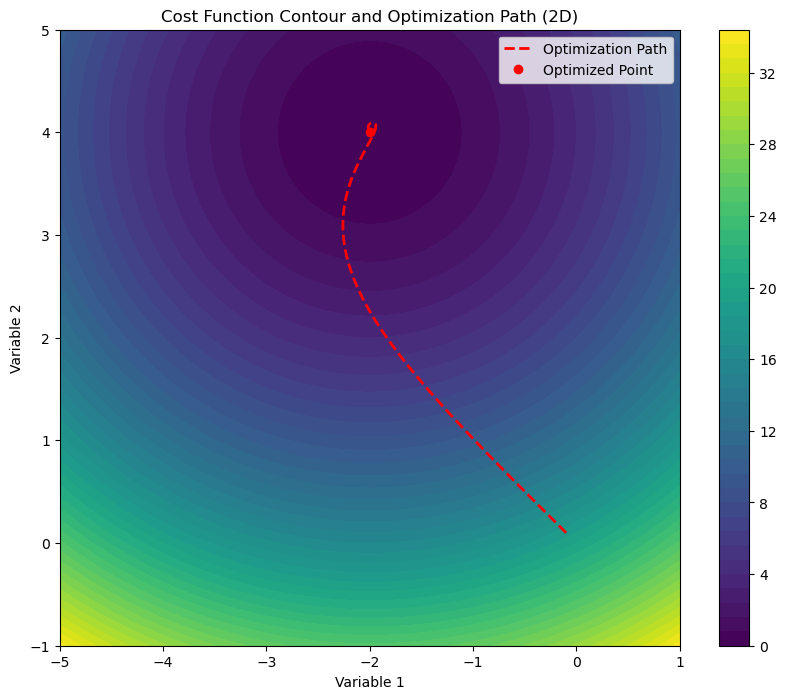

In [8]:
# Define the cost function for 2D minimization
def cost_fn_2d(x, y):
    return (x + 2)**2 + (y - 4)**2

# Initialize variables for 2D optimization
x, y = tf.Variable(0.0, dtype=tf.float32), tf.Variable(0.0, dtype=tf.float32)

# Create and use the optimizer for 2D case
optimizer_2d = Optimizer(cost_fn_2d, optimizer='adam', learning_rate=0.1, iterations=500)
variables_2d, final_cost_2d, _ = optimizer_2d.minimize([x, y])

# Output results
print(f"\n2D Optimization:")
print(f"Optimized Positions: x = {x.numpy()}, y = {y.numpy()}")
print(f"Final Cost: {final_cost_2d}")

# Plot the cost function and the optimization path for 2D
optimizer_2d.plot_cost_and_path(plot_ranges=[(-5, 1), (-1, 5)], resolution=100)